<a href="https://colab.research.google.com/github/JM-Elbambo/CCDATS1L_EXAM/blob/main/machine_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Problem 1

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
df = pd.read_csv('food.csv')

1. Remove all duplicates in the dataset. `(6 points)`

In [3]:
# put your answer here
df.drop_duplicates(inplace=True)

2. Use the pandas `isnull()` and `any()` function to check for NaN values in each column. `(6 points)`

In [4]:
# put your answer here
df.isnull().any()

GPA                  True
Gender              False
breakfast           False
calories_chicken    False
calories_day         True
                    ...  
type_sports          True
veggies_day         False
vitamins            False
waffle_calories     False
weight               True
Length: 61, dtype: bool

3. Retrieve all rows with NaN values in the dataset by using the pandas `isnull()` and `.any()` inside a dataframe. `(6 points)`

In [5]:
# put your answer here
df[df.isnull().any(axis=1)]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


4. Put all of the columns with NaN values in a list. Print the contents of the list. `(6 points)`

In [6]:
# put your answer here
columns_with_nan = list(df.columns[df.isnull().any()])
columns_with_nan

['GPA',
 'calories_day',
 'calories_scone',
 'comfort_food',
 'comfort_food_reasons',
 'comfort_food_reasons_coded',
 'cook',
 'cuisine',
 'diet_current',
 'drink',
 'eating_changes',
 'employment',
 'exercise',
 'father_education',
 'father_profession',
 'fav_cuisine',
 'fav_food',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'income',
 'life_rewarding',
 'marital_status',
 'meals_dinner_friend',
 'mother_education',
 'mother_profession',
 'on_off_campus',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'tortilla_calories',
 'type_sports',
 'weight']

5. Loop through the list that contains columns with NaN values and use the `fillna()` function to replace NaN values with empty an string. `(6 points)`

In [7]:
# put your answer here
for column in columns_with_nan:
  df[column] = df[column].fillna("")

6. In th **GPA** column, replace non-numeric values with zeroes. `(6 points)`

In [8]:
# put your answer here
import numpy as np
df["GPA"] = pd.to_numeric(df["GPA"], errors='coerce')
df["GPA"].fillna(0, inplace=True)

7. In the **comfort_food** column, replace empty values with "none". `(6 points)`

In [9]:
# put your answer here
df["comfort_food"].replace("", "none", inplace=True)

8. In the **weight** column, replace non-numeric values with "". `(6 points)`

In [10]:
# put your answer here
df["weight"] = pd.to_numeric(df["weight"], errors='coerce')
df["weight"].fillna("", inplace=True)

## Feature Scaling

9. Create a new dataframe which contains the following columns: `(6 points)`
- calories_chicken
- calories_scone
- tortilla_calories
- turkey_calories
- waffle_calories

In [11]:
# put your answer here
calorie_columns = ["calories_chicken", "calories_scone", "tortilla_calories", "turkey_calories", "waffle_calories"]
new_df = pd.DataFrame(df[calorie_columns])

10. Replace the empty values un calorie column with zeroes using the `replace()` function. `(6 points)`

In [12]:
# put your answer here
df[calorie_columns] = df[calorie_columns].replace("", 0)
new_df.replace("", 0, inplace=True)

11. Use the `astype()` function to convert all columns of the new dataframe to `int`. `(6 points)`

In [13]:
# put your answer here
new_df = new_df.astype(int)

12. Check the datatype of each column of the new dataframe using the `d_types` property. `(6 points)`

In [14]:
# put your answer here
new_df.dtypes

calories_chicken     int64
calories_scone       int64
tortilla_calories    int64
turkey_calories      int64
waffle_calories      int64
dtype: object

13. Create a new instance of the `MinMaxScaler()` class. `(6 points)`

In [15]:
# put your answer here
scaler = MinMaxScaler()

14. Use the `fit_transform()` function to normalize all calorie features between 0 and 1. `(6 points)`

In [16]:
# put your answer here
df[calorie_columns] = scaler.fit_transform(df[calorie_columns])

## Discretization

In [17]:
# Code to replace empty values with zeroes
df['weight'] = df['weight'].replace("", value="0")

# Code to convert the weight column to int
df['weight'] = df['weight'].astype(int)

15. Use the matplotlib `hist()` function to create a histogram of the distribution of values of the weight column in the dataset. `(6 points)`

(array([ 5.,  0.,  0.,  2., 25., 36., 38., 15.,  1.,  3.]),
 array([  0. ,  26.5,  53. ,  79.5, 106. , 132.5, 159. , 185.5, 212. ,
        238.5, 265. ]),
 <BarContainer object of 10 artists>)

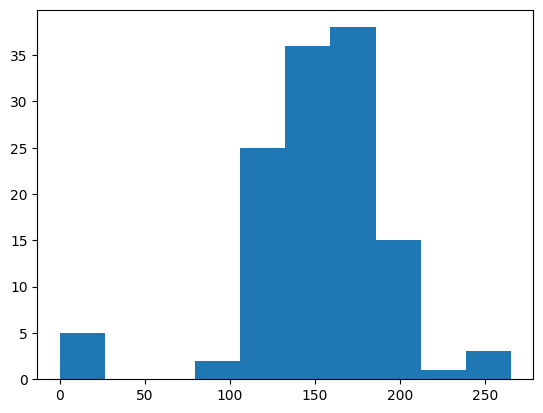

In [18]:
# put your answer here
plt.hist(df["weight"])

16. Pass three (3) bins to the matplotlib `hist()` function to create a histogram of the distribution of values of the weight column. `(6 points)`

(array([ 5., 88., 32.]),
 array([  0.        ,  88.33333333, 176.66666667, 265.        ]),
 <BarContainer object of 3 artists>)

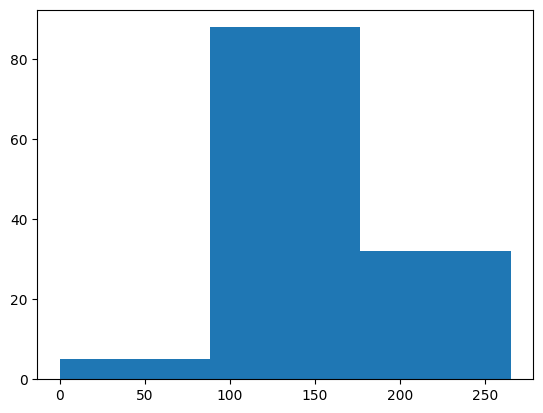

In [19]:
# put your answer here
plt.hist(df["weight"], 3)

17. Use the seaborn `histplot()` function to create a histogram:. `(6 points)`

    - Create three bins **0 to 100**, 1**00 to 200**, **200 to 300**
    - Name the first bin from **0 to 100** as **Underweight**
    - Name the second bin from **0 to 100** as **Normal**
    - Name the third bin from **0 to 100** as **Overweight**

    - Set the `set_xticks()` to **0,150,250**
    - Set the `set_xticklabels()` to **"Underweight", "Normal", "Overweight"**


<Axes: xlabel='weight', ylabel='Count'>

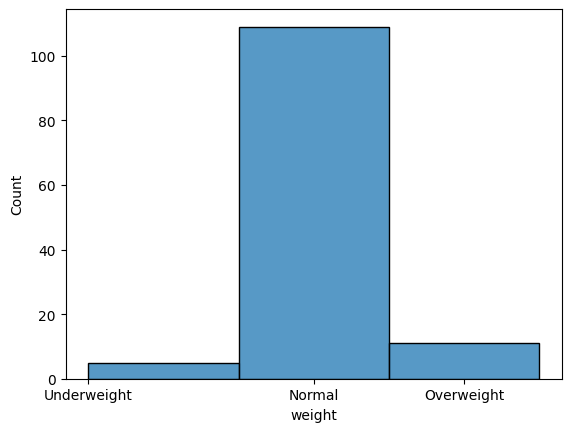

In [20]:
# put your answer here
plot = sns.histplot(df["weight"], bins=[0,100,200,300])
plot.set_xticks([0,150,250])
plot.set_xticklabels(["Underweight", "Normal", "Overweight"])
plot